# Research approach # 

I want to find out if there are any patterns in the trends that real estate prices and heading.
If there are any patters, can these patterns be exlained by different patterns or is it just the underlying time series trend.

## Initial data from 2016 ##

In [1]:
import os
import sys
import numpy as np  # Numerical computations
import pandas as pd  # Data manipulation and analysis
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns  # Statistical data visualization
import plotly.express as px  # Interactive visualizations
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder  # Scaling and encoding
from sklearn.impute import SimpleImputer  # Handling missing values


In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv("Data/State_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")

# Display the first 5 rows
print(df.head())

   RegionID  SizeRank    RegionName RegionType  StateName     2000-01-31  \
0         9         0    California      state        NaN  186449.090913   
1        54         1         Texas      state        NaN  111018.278532   
2        14         2       Florida      state        NaN  105939.099867   
3        43         3      New York      state        NaN  150532.342593   
4        47         4  Pennsylvania      state        NaN   96695.081059   

      2000-02-29     2000-03-31     2000-04-30     2000-05-31  ...  \
0  187075.801959  187922.015335  189758.892258  191893.984972  ...   
1  111078.608733  111107.869825  111253.095221  111347.145464  ...   
2  106168.573819  106446.741990  107012.186335  107621.957129  ...   
3  151068.385602  151584.413444  152694.249050  153842.532171  ...   
4   96901.904515   97096.263006   97492.336079   97899.202297  ...   

      2024-03-31     2024-04-30     2024-05-31     2024-06-30     2024-07-31  \
0  751372.268275  755206.460175  759664.12

In [3]:
df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31',
       ...
       '2024-03-31', '2024-04-30', '2024-05-31', '2024-06-30', '2024-07-31',
       '2024-08-31', '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31'],
      dtype='object', length=305)

In [4]:
df.drop("StateName", axis=1)

,RegionID,SizeRank,RegionName,RegionType,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,...,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31
0,9,0,California,state,186449.090913,187075.801959,187922.015335,189758.892258,191893.984972,194197.743808,...,751372.268275,755206.460175,759664.128050,762119.285892,764101.946106,765858.902416,768139.817461,769719.909003,771481.431234,773263.451715
1,54,1,Texas,state,111018.278532,111078.608733,111107.869825,111253.095221,111347.145464,111452.598683,...,301156.337588,302011.577853,302342.384240,302111.162485,301551.552917,301137.192876,300878.663198,300621.323932,300253.315889,299982.139510
2,14,2,Florida,state,105939.099867,106168.573819,106446.741990,107012.186335,107621.957129,108244.119799,...,392987.427789,393660.874166,393784.168515,393005.922425,391959.813824,390953.772856,390106.033410,389166.535852,387976.633622,386892.197619
3,43,3,New York,state,150532.342593,151068.385602,151584.413444,152694.249050,153842.532171,155084.143780,...,455999.732745,459623.866964,462954.983442,465633.483093,468137.717390,471201.874589,474034.562219,476427.532571,478239.595605,479975.705663
4,47,4,Pennsylvania,state,96695.081059,96901.904515,97096.263006,97492.336079,97899.202297,98317.350698,...,257837.322182,259484.525684,260951.427641,261824.643030,262157.675704,262404.295100,262785.747263,263518.744987,264393.449200,265564.886725
5,21,5,Illinois,state,124828.381038,124928.419372,125144.656720,125653.352226,126256.935346,126935.285770,...,254079.118701,256474.212359,258221.140984,259322.797252,259954.121403,260753.726099,261516.006549,262371.134191,263290.240157,264399.140053
6,44,6,Ohio,state,103304.588561,103367.717036,103463.454714,103744.975977,104174.225895,104706.835667,...,218688.309065,220675.104859,222470.430385,223682.825045,224489.676576,225065.645282,225467.238851,225946.216350,226572.741239,227781.809051
7,16,7,Georgia,state,122111.710995,122389.005574,122708.957209,123382.595841,124125.592421,124912.918712,...,322767.096787,324376.449267,325691.252304,326284.867696,326505.453534,326690.467020,326748.627133,326543.901135,325966.969051,325539.801900
8,36,8,North Carolina,state,126625.222584,126817.866492,127016.285849,127446.692481,127926.189386,128436.256545,...,323166.521593,324929.517284,326569.626042,327237.537617,327383.916467,327184.394483,327072.201839,327089.334764,327063.501938,327482.098953
9,30,9,Michigan,state,113111.645859,113173.945053,113402.026693,113856.364422,114526.379974,115262.258469,...,233445.237288,235671.956048,237269.909151,238207.736927,238501.942903,238789.493470,239035.585491,239617.959219,240243.796268,241165.159040


In [5]:
columns = df.columns[:4].tolist() + df.columns[-108:].tolist() # getting only data from 2016 to see how the us economy was moving
df = df[columns]
nan_columns = df.columns[df.isnull().any()] # the data only has one NAN and there is data from previous months and the following months in this case
nan_columns

Index(['2019-03-31'], dtype='object')

In [6]:
df["2019-03-31"][47] = df["2019-02-28"][47] + df["2019-04-30"][47] 

C:\Users\sahith\AppData\Local\Temp\ipykernel_19128\4053683217.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["2019-03-31"][47] = df["2019-02-28"][47] + df["2019-04-30"][47]


## I dentifying patterns the data ##
I want to see if there are any patters that humnans are not able to see using clustering. 

In [7]:
names, data = df.iloc[:,:4], df.iloc[:,4:]
data_columns = data.columns[-60:].tolist()
data2016, data2020 = data[data_columns], data.drop(data_columns, axis=1)

In [8]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(data2016), columns=data2016.columns)
print(df_scaled.head())

   2020-01-31  2020-02-29  2020-03-31  2020-04-30  2020-05-31  2020-06-30  \
0    2.614781    2.606657    2.594500    2.584097    2.572922    2.561383   
1   -0.392779   -0.394477   -0.397398   -0.402235   -0.407325   -0.410254   
2   -0.112746   -0.109882   -0.110230   -0.115103   -0.120899   -0.123801   
3    0.806473    0.803648    0.797669    0.791051    0.791378    0.793939   
4   -0.631115   -0.631083   -0.631091   -0.629432   -0.629170   -0.630798   

   2020-07-31  2020-08-31  2020-09-30  2020-10-31  ...  2024-03-31  \
0    2.557734    2.563809    2.579363    2.598554  ...    2.699773   
1   -0.410333   -0.410601   -0.413795   -0.418815  ...   -0.409551   
2   -0.124336   -0.124337   -0.126885   -0.130591  ...    0.224661   
3    0.791052    0.777758    0.763356    0.752559  ...    0.659843   
4   -0.634355   -0.637705   -0.639202   -0.639505  ...   -0.708725   

   2024-04-30  2024-05-31  2024-06-30  2024-07-31  2024-08-31  2024-09-30  \
0    2.699083    2.706256    2.715055  

In [9]:
from sklearn.cluster import KMeans

# Apply K-means clustering (let's assume we want 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=32)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

print(df_scaled.head())

   2020-01-31  2020-02-29  2020-03-31  2020-04-30  2020-05-31  2020-06-30  \
0    2.614781    2.606657    2.594500    2.584097    2.572922    2.561383   
1   -0.392779   -0.394477   -0.397398   -0.402235   -0.407325   -0.410254   
2   -0.112746   -0.109882   -0.110230   -0.115103   -0.120899   -0.123801   
3    0.806473    0.803648    0.797669    0.791051    0.791378    0.793939   
4   -0.631115   -0.631083   -0.631091   -0.629432   -0.629170   -0.630798   

   2020-07-31  2020-08-31  2020-09-30  2020-10-31  ...  2024-04-30  \
0    2.557734    2.563809    2.579363    2.598554  ...    2.699083   
1   -0.410333   -0.410601   -0.413795   -0.418815  ...   -0.416794   
2   -0.124336   -0.124337   -0.126885   -0.130591  ...    0.213328   
3    0.791052    0.777758    0.763356    0.752559  ...    0.666847   
4   -0.634355   -0.637705   -0.639202   -0.639505  ...   -0.709183   

   2024-05-31  2024-06-30  2024-07-31  2024-08-31  2024-09-30  2024-10-31  \
0    2.706256    2.715055    2.725548  

c:\Users\sahith\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


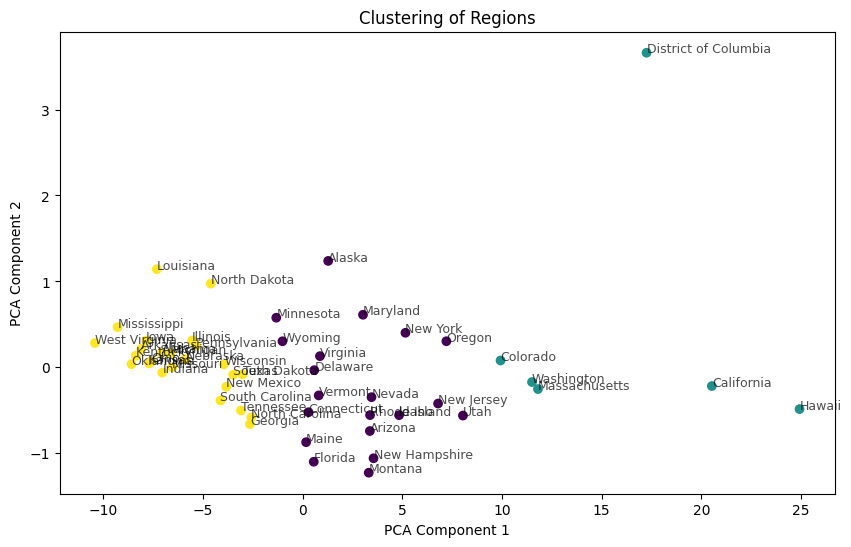

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions using PCA (2 components for 2D visualization)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled.drop('Cluster', axis=1))

plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_scaled['Cluster'], cmap='viridis')

for i, region in enumerate(df['RegionName']):
    plt.annotate(region, (df_pca[i, 0], df_pca[i, 1]), fontsize=9, alpha=0.7)

plt.title('Clustering of Regions')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

I pulled up the 2016 election results and stated seeing a pattern to see if that has anything to do with this.

In [11]:
custom_colors = ['red', 'blue', 'green', 'orange']

state_color_mapping = {
    'California': 'Blue',
    'Texas': 'Red',
    'Florida': 'Red',
    'New York': 'Blue',
    'Pennsylvania': 'Red',
    'Illinois': 'Purple',
    'Ohio': 'Red',
    'Georgia': 'Red',
    'North Carolina': 'Orange',
    'Michigan': 'Blue',
    'New Jersey': 'Purple',
    'Virginia': 'Blue',
    'Washington': 'Blue',
    'Arizona': 'Red',
    'Massachusetts': 'Blue',
    'Tennessee': 'Red',
    'Indiana': 'Red',
    'Maryland': 'Blue',
    'Missouri': 'Red',
    'Wisconsin': 'Blue',
    'Colorado': 'Blue',
    'Minnesota': 'Blue',
    'South Carolina': 'Red',
    'Alabama': 'Red',
    'Louisiana': 'Red',
    'Kentucky': 'Red',
    'Oregon': 'Blue',
    'Oklahoma': 'Red',
    'Connecticut': 'Purple',
    'Utah': 'Red',
    'Iowa': 'Red',
    'Nevada': 'Blue',
    'Arkansas': 'Red',
    'Mississippi': 'Red',
    'Kansas': 'Red',
    'New Mexico': 'Purple',
    'Nebraska': 'Red',
    'Idaho': 'Red',
    'West Virginia': 'Red',
    'Hawaii': 'Blue',
    'New Hampshire': 'Blue',
    'Maine': 'Blue',
    'Rhode Island': 'Blue',
    'Montana': 'Red',
    'Delaware': 'Purple',
    'South Dakota': 'Red',
    'North Dakota': 'Red',
    'Alaska': 'Red',
    'District of Columbia': 'Blue',
    'Vermont': 'Blue',
    'Wyoming': 'Red'
}

df['Color'] = df['RegionName'].map(state_color_mapping)
df.head()  # Just to check the first few rows

,RegionID,SizeRank,RegionName,RegionType,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,...,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,Color
0,9,0,California,state,419870.130840,425090.878889,431021.368540,435502.280230,438474.659693,441101.274823,...,755206.460175,759664.128050,762119.285892,764101.946106,765858.902416,768139.817461,769719.909003,771481.431234,773263.451715,Blue
1,54,1,Texas,state,171937.734784,173161.653763,174064.185315,174922.940533,175751.664229,176739.502967,...,302011.577853,302342.384240,302111.162485,301551.552917,301137.192876,300878.663198,300621.323932,300253.315889,299982.139510,Red
2,14,2,Florida,state,188061.142617,189405.897199,190642.030888,191951.389502,193247.113078,194632.254889,...,393660.874166,393784.168515,393005.922425,391959.813824,390953.772856,390106.033410,389166.535852,387976.633622,386892.197619,Red
3,43,3,New York,state,281360.224630,282051.672547,282364.627060,282923.916113,283781.986606,285112.736451,...,459623.866964,462954.983442,465633.483093,468137.717390,471201.874589,474034.562219,476427.532571,478239.595605,479975.705663,Blue
4,47,4,Pennsylvania,state,160071.920988,160563.599715,160604.170146,160597.073951,160791.291690,161286.486649,...,259484.525684,260951.427641,261824.643030,262157.675704,262404.295100,262785.747263,263518.744987,264393.449200,265564.886725,Red


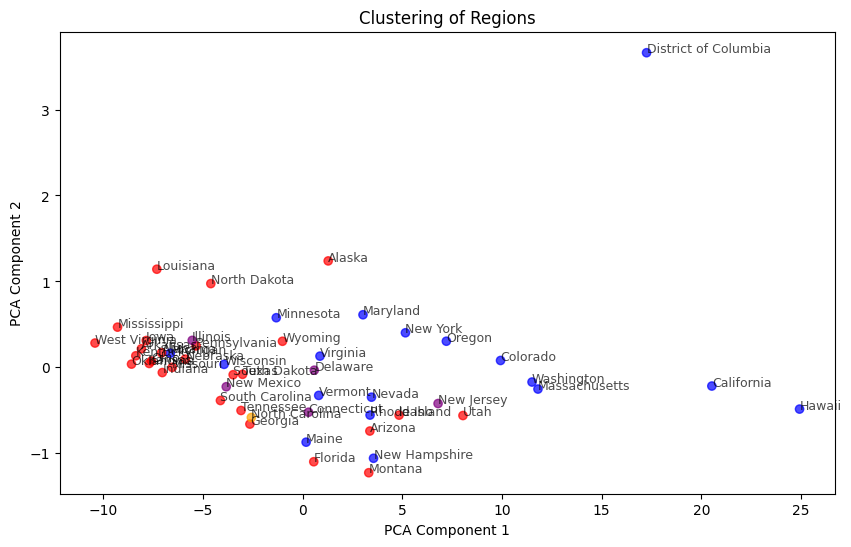

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have scaled the dataframe (df_scaled) and dropped the 'Cluster' column already

# Reduce dimensions using PCA (2 components for 2D visualization)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled.drop('Cluster', axis=1))

# Create a mapping for colors from df['Color'] (the colors should be 'Red', 'Blue', etc.)
color_map = df['Color'].map({'Blue': 'b', 'Red': 'r', 'Purple': 'purple', 'Orange': 'orange'})

# Plot the PCA components, using the colors from the 'Color' column
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=color_map, alpha=0.7)

# Annotate the regions (or states)
for i, region in enumerate(df['RegionName']):
    plt.annotate(region, (df_pca[i, 0], df_pca[i, 1]), fontsize=9, alpha=0.7)

# Add titles and labels
plt.title('Clustering of Regions')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Show the plot
plt.show()


So from this we can definately see that there are patterns between the realestate prices and the views on elections. We cannot say, that this is all becuase of the elections but atleast i'm not going crazy when i saw the pattern

### changes to the 2020 election

   2016-01-31  2016-02-29  2016-03-31  2016-04-30  2016-05-31  2016-06-30  \
0    2.319328    2.351948    2.393384    2.421495    2.434668    2.443244   
1   -0.439600   -0.435656   -0.431674   -0.427715   -0.424613   -0.421829   
2   -0.260182   -0.255913   -0.249413   -0.241524   -0.234205   -0.227913   
3    0.778026    0.769215    0.759011    0.753182    0.751109    0.752687   
4   -0.571639   -0.575054   -0.579658   -0.584356   -0.587430   -0.589304   

   2016-07-31  2016-08-31  2016-09-30  2016-10-31  ...  2019-03-31  \
0    2.436513    2.419600    2.391897    2.371608  ...    2.331253   
1   -0.418479   -0.414485   -0.409779   -0.406236  ...   -0.397740   
2   -0.221110   -0.212800   -0.203230   -0.194347  ...   -0.148660   
3    0.754218    0.754308    0.752768    0.750542  ...    0.676551   
4   -0.589991   -0.589891   -0.589320   -0.589300  ...   -0.624354   

   2019-04-30  2019-05-31  2019-06-30  2019-07-31  2019-08-31  2019-09-30  \
0    2.582806    2.566833    2.557292  

c:\Users\sahith\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


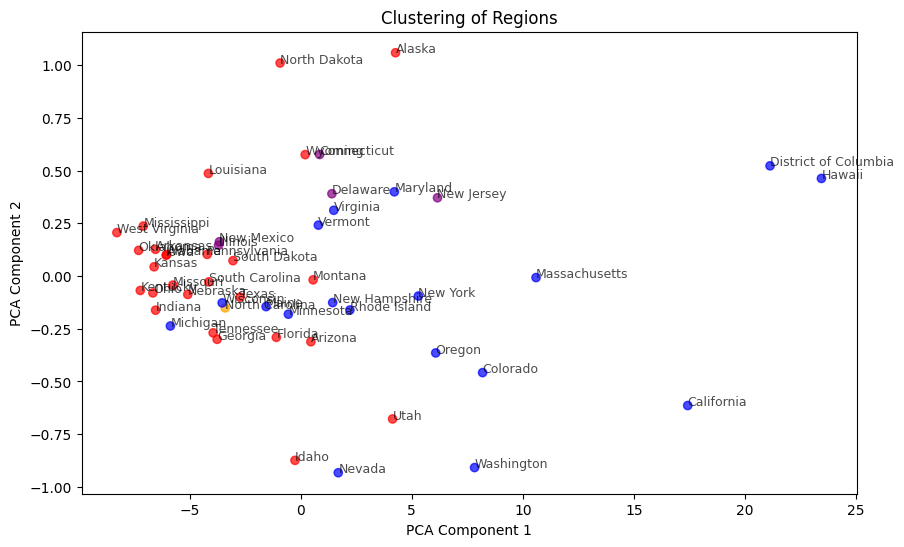

In [13]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(data2020), columns=data2020.columns)
print(df_scaled.head())

kmeans = KMeans(n_clusters=5, random_state=32)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

print(df_scaled.head())

# Reduce dimensions using PCA (2 components for 2D visualization)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled.drop('Cluster', axis=1))

# Create a mapping for colors from df['Color'] (the colors should be 'Red', 'Blue', etc.)
color_map = df['Color'].map({'Blue': 'b', 'Red': 'r', 'Purple': 'purple', 'Orange': 'orange'})

# Plot the PCA components, using the colors from the 'Color' column
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=color_map, alpha=0.7)

# Annotate the regions (or states)
for i, region in enumerate(df['RegionName']):
    plt.annotate(region, (df_pca[i, 0], df_pca[i, 1]), fontsize=9, alpha=0.7)

# Add titles and labels
plt.title('Clustering of Regions')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Show the plot
plt.show()

## Crime and Vacency